# Exploratory Data Analysis on Haberman Dataset

## About Dataset

The dataset contains cases from a study that was conducted between 1958 and 1970 
at the University of Chicago's Billings Hospital on the survival of patients 
who had undergone surgery for breast cancer.

## Load Dataset

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


#load "Haberman" dataset into pandas dataframe
haberman = pd.read_csv("haberman.csv")

# no. of datapoints
print("Number of datapoints are : ", haberman.shape[0])

# no. of features
print("Number of features are : ", haberman.shape[1])

# column names in dataset
print("The column names are : ", haberman.columns)

Number of datapoints are :  306
Number of features are :  4
The column names are :  Index(['Age', 'Year of operation', 'axillary nodes', 'Survival status'], dtype='object')


Observations :
1. There are total 306 number of instances
2. There are 3 features with one class label
3. The different features are - 'age', 'axillary nodes' and 'year of operation'
4. The class label is 'survival status'

In [44]:
# top 5 dataset
print("Top 5 data points in the dataset")
print("--------------------------------------------------")
print(haberman.head(5))

Top 5 data points in the dataset
--------------------------------------------------
   Age  Year of operation  axillary nodes  Survival status
0   30                 64               1                1
1   30                 62               3                1
2   30                 65               0                1
3   31                 59               2                1
4   31                 65               4                1


In [45]:
# datapoints for each class 
haberman["Survival status"].value_counts()

1    225
2     81
Name: Survival status, dtype: int64

Observations :
1. All 3 features are numerical
2. Class label is also numerical
3. Dataset has imbalanced data

### 2D Scatter Plot

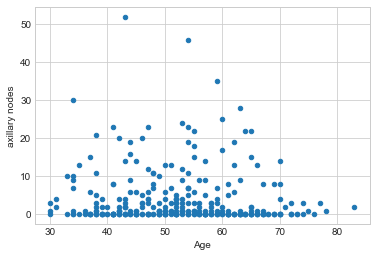

In [46]:
# 2D Scatter Plot
haberman.plot(kind='scatter', x='Age', y='axillary nodes')

Observation : Cannot observe clearly in this plot

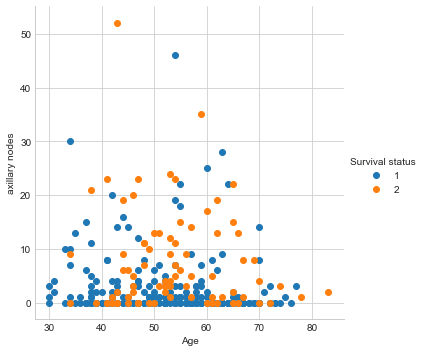

In [47]:
# Scatter plot with coloring
sns.set_style("whitegrid")
sns.FacetGrid(haberman, hue="Survival status", size=5)  \
   .map(plt.scatter, "Age", "axillary nodes") \
   .add_legend();
plt.show()

Observation :
    Even colored scatter plot also not much informative

### 3D Scatter Plot

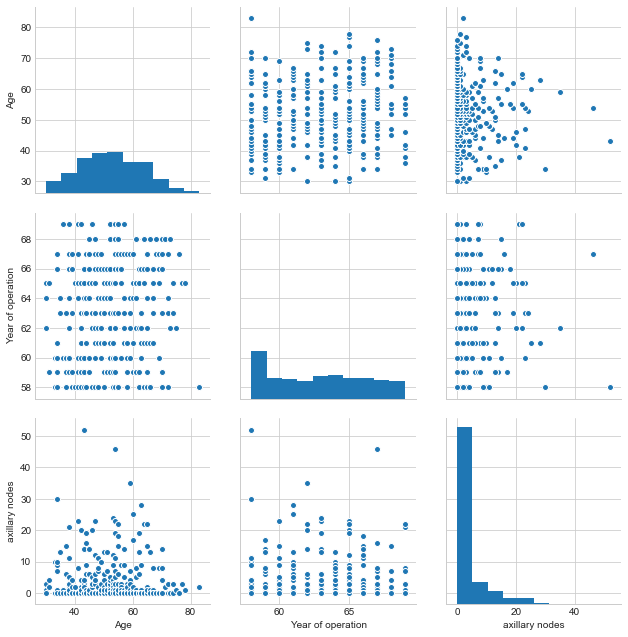

In [48]:
haberman_features = haberman[haberman.columns[0:3]]
plt.close()
sns.set_style("whitegrid")
sns.pairplot(haberman_features, size=3);
plt.show()

Observations :
1. Not able to identify useful features by 2D scatter and 3D pair plots
2. The features are overlapped

### Histogram and Univariate Analysis

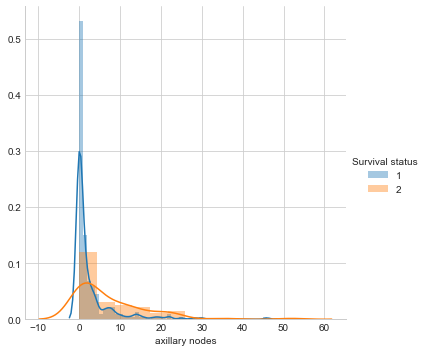

In [49]:
sns.FacetGrid(haberman, hue="Survival status", size=5) \
   .map(sns.distplot, "axillary nodes") \
   .add_legend();
plt.show()

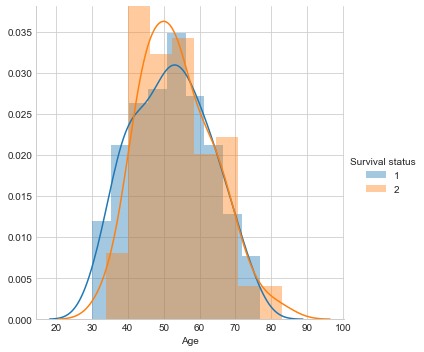

In [50]:
sns.FacetGrid(haberman, hue="Survival status", size=5) \
   .map(sns.distplot, "Age") \
   .add_legend()
plt.show()

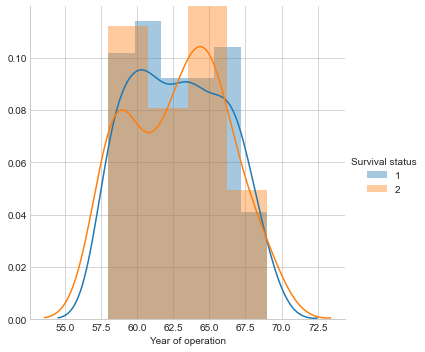

In [51]:
sns.FacetGrid(haberman, hue="Survival status", size=5) \
   .map(sns.distplot, "Year of operation") \
   .add_legend()
plt.show()

Observations :
1. "Axillary nodes" feature has distribution different than other two features.
2. "Age" and "Year of operation" have almost same distribution and are not helpful for analysis.
3.  Many survival patients fall into zero axillary nodes

### PDF and CDF

 counts ---------------- 
 [0.43478261 0.08115942 0.02898551 0.0173913  0.01449275 0.02028986
 0.0057971  0.0057971  0.00289855 0.0115942  0.00289855 0.00289855
 0.00289855 0.00289855 0.0057971  0.         0.00289855 0.
 0.00289855 0.00289855 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.00289855]

 Bin Edges --------------
 [ 0.          1.53333333  3.06666667  4.6         6.13333333  7.66666667
  9.2        10.73333333 12.26666667 13.8        15.33333333 16.86666667
 18.4        19.93333333 21.46666667 23.         24.53333333 26.06666667
 27.6        29.13333333 30.66666667 32.2        33.73333333 35.26666667
 36.8        38.33333333 39.86666667 41.4        42.93333333 44.46666667
 46.        ]
 counts ---------------- 
 [0.19230769 0.08547009 0.04985755 0.02136752 0.02849003 0.03561254
 0.02849003 0.02849003 0.02136752 0.00712251 0.01424501 0.00712251
 0.01424501 0.02849003 0.         0.         0.         0.
 0.         0.         0.0

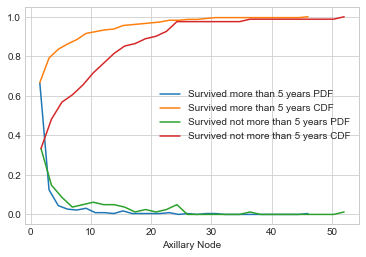

In [52]:
haberman_survived = haberman[haberman["Survival status"] == 1]
haberman_non_survived = haberman[haberman["Survival status"] == 2]

counts_survived, bin_edges_survived = np.histogram(haberman_survived["axillary nodes"], bins=30, density=True)
print (" counts ---------------- \n",counts_survived)
print ("\n Bin Edges --------------\n",bin_edges_survived)

counts_non_survived, bin_edges_non_survived = np.histogram(haberman_non_survived["axillary nodes"], bins=30, density=True)
print (" counts ---------------- \n",counts_non_survived)
print ("\n Bin Edges --------------\n",bin_edges_non_survived)

#compute PDF and CDF for survived
pdf_survived = counts_survived/sum(counts_survived)
cdf_survived = np.cumsum(pdf_survived)

#compute PDF and CDF for non-survived
pdf_non_survived = counts_non_survived/sum(counts_non_survived)
cdf_non_survived = np.cumsum(pdf_non_survived)

plt.plot(bin_edges_survived[1:], pdf_survived)
plt.plot(bin_edges_survived[1:], cdf_survived)
plt.plot(bin_edges_non_survived[1:], pdf_non_survived)
plt.plot(bin_edges_non_survived[1:], cdf_non_survived)

plt.xlabel("Axillary Node")

plt.legend(["Survived more than 5 years PDF", "Survived more than 5 years CDF", "Survived not more than 5 years PDF", "Survived not more than 5 years CDF" ])

plt.show();

Observations :
1. If Axillary nodes < 46 is => Survived
2. If Axillary nodes > 46 is => Non Survived

In [53]:
print("Statistics about survived more than 5 years")
haberman_survived.describe()

Statistics about survived more than 5 years


,Age,Year of operation,axillary nodes,Survival status
count,225.000000,225.000000,225.000000,225.0
mean,52.017778,62.862222,2.791111,1.0
std,11.012154,3.222915,5.870318,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,0.000000,1.0
75%,60.000000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


In [54]:
print("Statistics about not survived more than 5 years")
haberman_non_survived.describe()

Statistics about not survived more than 5 years


,Age,Year of operation,axillary nodes,Survival status
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,62.827160,7.456790,2.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,58.000000,0.000000,2.0
25%,46.000000,59.000000,1.000000,2.0
50%,53.000000,63.000000,4.000000,2.0
75%,61.000000,65.000000,11.000000,2.0
max,83.000000,69.000000,52.000000,2.0


Observations :
    1. Mean of axillary nodes is greater for the patients who are non survived

### Box Plot

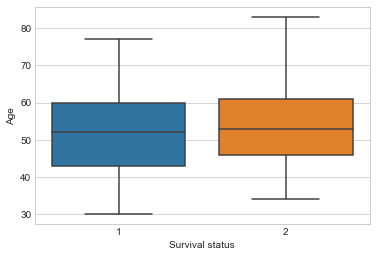

In [57]:
sns.boxplot(x='Survival status',y='Age', data=haberman)
plt.show()

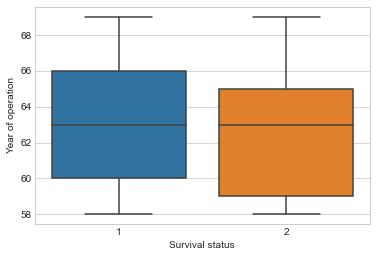

In [58]:
sns.boxplot(x='Survival status',y='Year of operation', data=haberman)
plt.show()

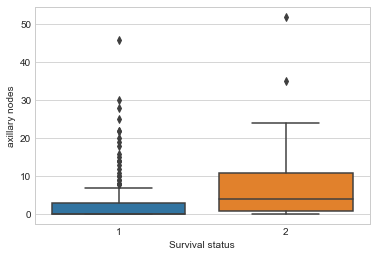

In [59]:
sns.boxplot(x='Survival status',y='axillary nodes', data=haberman)
plt.show()

### Violin Plots

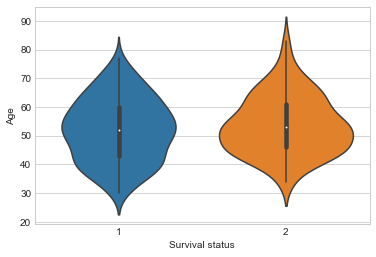

In [37]:
sns.violinplot(x='Survival status',y='Age', data=haberman)
plt.show()

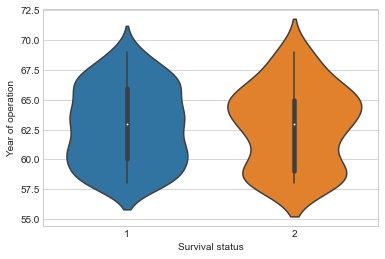

In [38]:
sns.violinplot(x='Survival status',y='Year of operation', data=haberman)
plt.show()

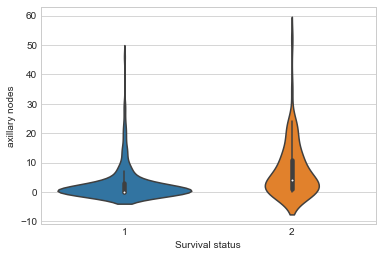

In [39]:
sns.violinplot(x='Survival status',y='axillary nodes', data=haberman)
plt.show()

Observation (Univariate Analysis) :

The patients who undergone treatment after 1966 have higher chance to surive. The patients who undergone treatment before 1959 have the lower chance to surive.


### Joint Plot

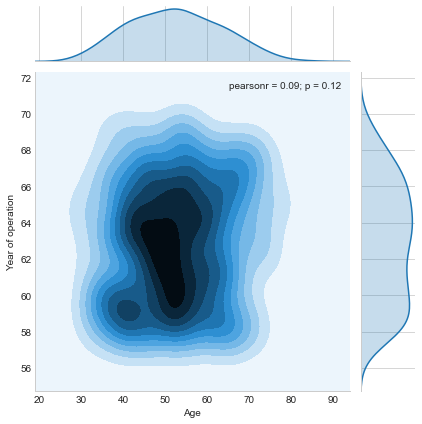

In [40]:
sns.jointplot(data=haberman, x="Age", y="Year of operation", kind="kde")
plt.show()

Observations :
1. There are more patients operation year between 59 and 63
2. And Age of them is between 43 to 55

Conclusion :
    1. The Haberman dataset is imbalanced dataset with very few features
    2. The features are non-linearly separable and most of them are overlapped.
    3. Axillary node feature was helpful compared to other features,
        a) If Axillary nodes < 46 is => Survived
        b) If Axillary nodes > 46 is => Non Survived
    4. The patients who undergone treatment after 1966 have higher chance to surive. The patients who undergone treatment before 1959 have the lower chance to surive.
    5. This dataset doesnot easily modelled by if-else need complex models.